# Tracking Minor Trend Changes With Prophet

In [2]:
import numpy as np
import pandas as pd
from prophet import Prophet

from prophet.plot import add_changepoints_to_plot

In [3]:
df = pd.read_csv("HospitalityEmployees.csv")

In [4]:
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [6]:
df.columns = ["ds", "y"]

In [7]:
df["ds"] = pd.to_datetime(df["ds"])

In [8]:
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      348 non-null    datetime64[ns]
 1   y       348 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.6 KB


<AxesSubplot:xlabel='ds'>

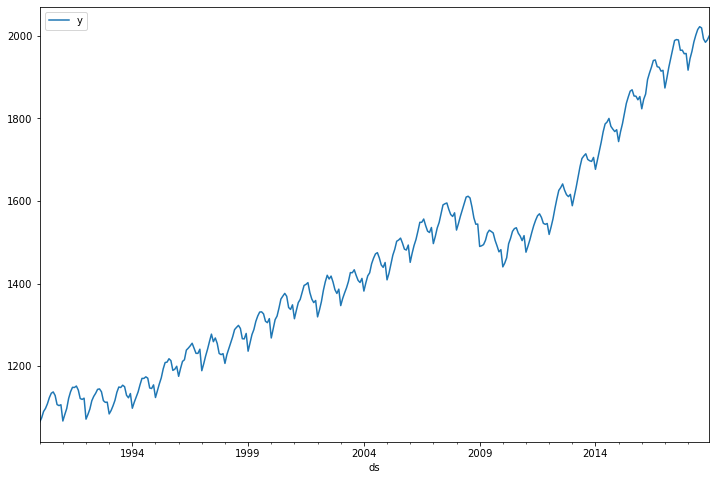

In [10]:
df.plot(x= "ds", y= "y", figsize= (12,8))

In [11]:
model= Prophet()

In [12]:
model.fit(df)

03:17:57 - cmdstanpy - INFO - Chain [1] start processing
03:17:58 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future_df = model.make_future_dataframe(periods=24, freq= "MS")

In [14]:
future_df.head()

,ds
0,1990-01-01
1,1990-02-01
2,1990-03-01
3,1990-04-01
4,1990-05-01


In [15]:
forecast = model.predict(future_df)

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,1107.275673,1046.673301,1072.000799,1107.275673,1107.275673,-47.610612,-47.610612,-47.610612,-47.610612,-47.610612,-47.610612,0.0,0.0,0.0,1059.665060
1,1990-02-01,1107.788191,1061.939158,1086.900571,1107.788191,1107.788191,-33.149270,-33.149270,-33.149270,-33.149270,-33.149270,-33.149270,0.0,0.0,0.0,1074.638921
2,1990-03-01,1108.251111,1076.285970,1101.689870,1108.251111,1108.251111,-18.665064,-18.665064,-18.665064,-18.665064,-18.665064,-18.665064,0.0,0.0,0.0,1089.586047
3,1990-04-01,1108.763630,1093.072728,1118.340919,1108.763630,1108.763630,-3.011239,-3.011239,-3.011239,-3.011239,-3.011239,-3.011239,0.0,0.0,0.0,1105.752390
4,1990-05-01,1109.259615,1110.140178,1135.293483,1109.259615,1109.259615,13.309684,13.309684,13.309684,13.309684,13.309684,13.309684,0.0,0.0,0.0,1122.569300


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
367,2020-08-01,2150.062725,2150.241294,2206.589933,2124.342819,2174.793176,28.333207,28.333207,28.333207,28.333207,28.333207,28.333207,0.0,0.0,0.0,2178.395932
368,2020-09-01,2155.571007,2137.313549,2198.017319,2127.704374,2182.175227,12.142018,12.142018,12.142018,12.142018,12.142018,12.142018,0.0,0.0,0.0,2167.713025
369,2020-10-01,2160.901602,2121.709649,2186.430212,2130.574647,2190.602906,-4.586287,-4.586287,-4.586287,-4.586287,-4.586287,-4.586287,0.0,0.0,0.0,2156.315314
370,2020-11-01,2166.409883,2118.265031,2186.954093,2134.019311,2198.285306,-12.562162,-12.562162,-12.562162,-12.562162,-12.562162,-12.562162,0.0,0.0,0.0,2153.847721
371,2020-12-01,2171.740478,2127.243827,2198.521466,2137.280687,2205.962709,-7.970088,-7.970088,-7.970088,-7.970088,-7.970088,-7.970088,0.0,0.0,0.0,2163.770390


In [18]:
df.tail()

,ds,y
343,2018-08-01,2019.1
344,2018-09-01,1992.5
345,2018-10-01,1984.3
346,2018-11-01,1990.1
347,2018-12-01,2000.2


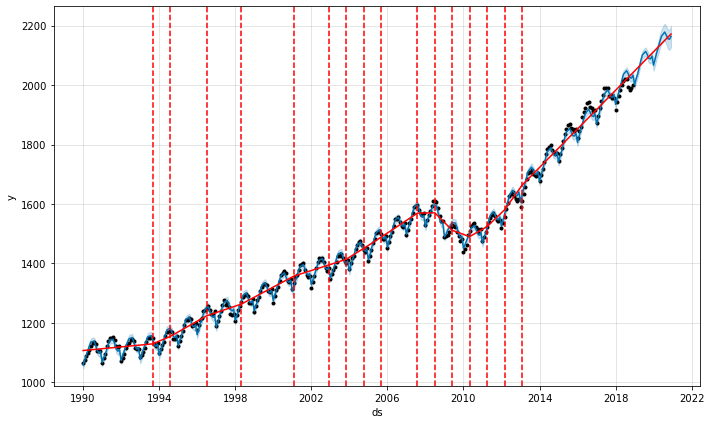

In [20]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)